In [1]:
from power.ml_ops.data import get_data_with_cache
from power.params import *
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
query = f"""
    SELECT *
    FROM {GCP_PROJECT}.{BQ_DATASET}.processed_pv
    ORDER BY utc_time
"""

data_processed_cache_path = Path(LOCAL_DATA_PATH).joinpath("processed", f"processed_pv.csv")
data_processed = get_data_with_cache(
    gcp_project=GCP_PROJECT,
    query=query,
    cache_path=data_processed_cache_path,
    data_has_header=True
)
data_processed['utc_time'] = pd.to_datetime(data_processed["utc_time"])
data_processed = data_processed.set_index("utc_time")
data_processed.drop(columns=['local_time'], inplace=True)


Load data from local CSV...
✅ Data loaded, with shape (376944, 3)


In [6]:
data_processed

,electricity
utc_time,
1980-01-01 00:00:00+00:00,0.0
1980-01-01 01:00:00+00:00,0.0
1980-01-01 02:00:00+00:00,0.0
1980-01-01 03:00:00+00:00,0.0
1980-01-01 04:00:00+00:00,0.0
...,...
2022-12-31 19:00:00+00:00,0.0
2022-12-31 20:00:00+00:00,0.0
2022-12-31 21:00:00+00:00,0.0


<Axes: xlabel='utc_time'>

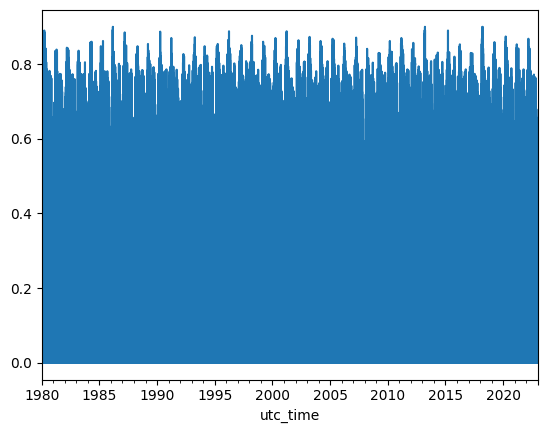

In [3]:
data_processed['electricity'].plot()

<Axes: xlabel='utc_time'>

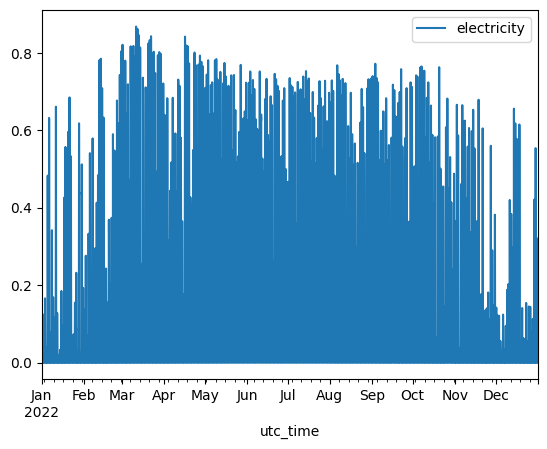

In [ ]:
# cut down the data to a smaller time frame

df = data_processed.iloc[-365*24:] # last year
df.plot()

In [48]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

adfuller(df['electricity'])[1], adfuller(df['electricity'].diff().dropna())[1]

(2.705857716940208e-11, 0.0)

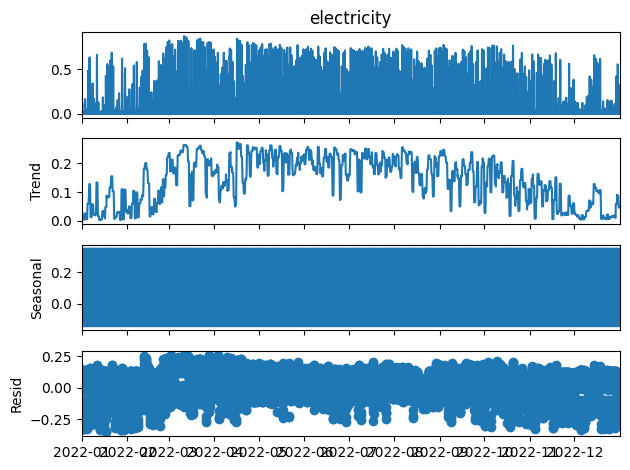

In [58]:
result_add = seasonal_decompose(df['electricity'], model='additive')
result_add.plot();